## top reco , w* reco (genparticle)

1840
Number of top quarks: 499
Number of W virtual particles: 499


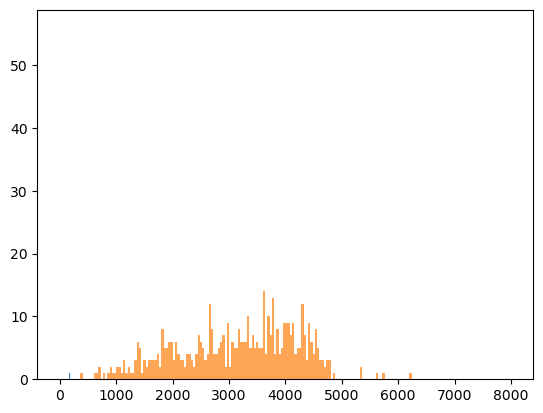

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#from PhysicsTools.NanoAODTools.postprocessing.tools import *
#from PhysicsTools.NanoAODTools.postprocessing.framework.eventloop import Module
#from PhysicsTools.NanoAODTools.postprocessing.framework.datamodel import Collection,Object
#from PhysicsTools.NanoAODTools.postprocessing.framework.postprocessor import PostProcessor
#from PhysicsTools.NanoAODTools.postprocessing.analyser.ID.GenStatus import *
#from PhysicsTools.NanoAODTools.postprocessing.analyser.AnalyserHelper.AnalyserHelper import *
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak



## x 방향이 이벤트 y 방향이 각 입자의 정보 z 방향이 입자들 각각이라 생각하면 될듯?
# 각 층(이벤트)에 입자들이 쭉 있고 거기에 정보가 있다고 생각하면 될듯?

## 일단 보고 싶은 키워드나 주제를 고르면 그게 이벤트 별로 있으면 다 뽑아옴 . 이제 거기서 필터로 걸러내면 모든 이벤트는 해당이 안되고 특정 이벤트만 남으면 거기 안에 들어있는 값 쓰면 됨

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()


pdgid = events["GenPart_pdgId"].array()
mass = events["GenPart_mass"].array()
pt = events["GenPart_pt"].array()
phi = events["GenPart_phi"].array()
eta = events["GenPart_eta"].array()



wmask =(((pdgid == 24) | (pdgid == -24)) & (mass < 100))
bmask = ((pdgid == 5) | (pdgid == -5) )
wmass = mass[wmask]
bmass = mass[bmask]
wpt = pt[wmask]
bpt = pt[bmask]
wphi = phi[wmask]
bphi = phi[bmask]
weta = eta[wmask]
beta = eta[bmask]
# 두 개 이상의 b quark, 하나이상의 W onshell boson만 있는 이벤트만 필터링
valid_events = (ak.num(bpt) >= 2) & (ak.num(wpt) >= 1)

# apply mask
bpt = bpt[valid_events]
bphi = bphi[valid_events]
beta = beta[valid_events]
bmass = bmass[valid_events]
wpt = wpt[valid_events]
wphi = wphi[valid_events]
weta = weta[valid_events]
wmass = wmass[valid_events]


# 벡터 구성
b1 = vector.array({
    "pt": bpt[:, 0],
    "phi": bphi[:, 0],
    "eta": beta[:, 0],
    "mass": bmass[:, 0]
})

b2 = vector.array({
    "pt": bpt[:, 1],
    "phi": bphi[:, 1],
    "eta": beta[:, 1],
    "mass": bmass[:, 1]
})

w1 = vector.array({
    "pt": wpt[:, 0],
    "phi": wphi[:, 0],
    "eta": weta[:, 0],
    "mass": wmass[:, 0]
})

top =  b2 + w1
#print("Top mass (reco from gen parts):", (top.mass), "GeV")
# 히스토그램 그리기
plt.hist(top.mass, bins=100, range=(160, 200), alpha=1.0, label='Top Mass')
wvirtual = b1 + b2 + w1
plt.hist(wvirtual.mass, bins=200, range=(0, 8000), alpha=0.7, label='W Virtual Mass')

#top 갯수
print("Number of top quarks:", len(top.mass))
# wvirtual 갯수
print("Number of W virtual particles:", len(wvirtual.mass))




## two Genjet ak8 jet delat r 

1840


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  4.,  4.,  5.,
         6.,  7.,  6.,  4., 11., 12.,  9., 14., 15., 14.,  8., 11., 21.,
        15., 19., 31., 61., 43., 66., 31., 24.,  9., 11.,  5., 10.,  4.,
         3.,  3.,  1.,  3.,  3.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ,  0.60000002,  0.69999999,  0.80000001,  0.89999998,
         1.        ,  1.10000002,  1.20000005,  1.29999995,  1.39999998,
         1.5       ,  1.60000002,  1.70000005,  1.79999995,  1.89999998,
         2.        ,  2.0999999 ,  2.20000005,  2.29999995,  2.4000001 ,
         2.5       ,  2.5999999 ,  2.70000005,  2.79999995,  2.900000

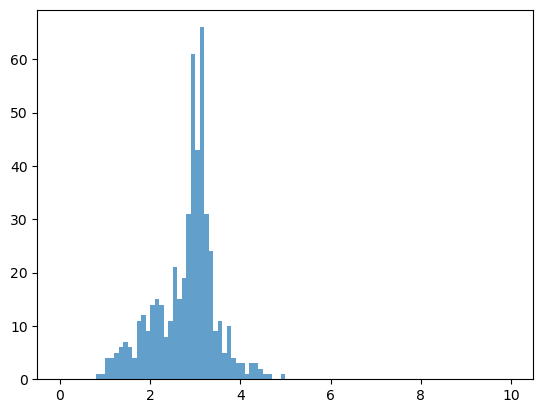

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()

ak8jetmass = events["GenJetAK8_mass"].array()
ak8flavor = events["GenJetAK8_partonFlavour"].array()
ak8eta = events["GenJetAK8_eta"].array()
ak8phi = events["GenJetAK8_phi"].array()
bmask = (ak8flavor == 5) 
notbmask = (ak8flavor != 5)

ak8jetmass_b = ak8jetmass[bmask]
ak8jetmass_notb = ak8jetmass[notbmask]
import matplotlib.pyplot as plt

# 1차원 배열로 flatten (awkward → numpy 변환)
aa = ak.to_numpy(ak.flatten(ak8jetmass_b))
nb = ak.to_numpy(ak.flatten(ak8jetmass_notb))
'''
plt.hist(aa, bins=100, range=(0, 500), alpha=0.9, label="b-quark jets")
plt.hist(nb, bins=100, range=(0, 500), alpha=0.5, label="non-b jets")
plt.xlabel("Jet Mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.show()
'''
# 조건: GenJetAK8가 2개 이상인 이벤트만
valid = ak.num(ak8jetmass) >= 2
ak8mass = ak8jetmass[valid]
eta = ak8eta[valid]
phi = ak8phi[valid]

# 내림차순 정렬된 인덱스
sorted_idx = ak.argsort(ak8mass, axis=1, ascending=False)

# 인덱스로 정렬된 jet들 얻기
sorted_eta = eta[sorted_idx]
sorted_phi = phi[sorted_idx]

# 가장 큰 두 jet의 eta, phi
eta1 = ak.firsts(sorted_eta)          # leading
eta2 = ak.firsts(ak.drop_none(sorted_eta[:, 1:]))  # subleading

phi1 = ak.firsts(sorted_phi)
phi2 = ak.firsts(ak.drop_none(sorted_phi[:, 1:]))

# ΔR 계산
delta_eta = eta1 - eta2
delta_phi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
delta_r = np.sqrt(delta_eta**2 + delta_phi**2)

plt.hist(delta_r, bins=100, range=(0, 10), alpha=0.7, label='ΔR between leading jets')


##  top reco with jets

[36.8, 39.3, 30.7, 13.5, 65.2, 87.2, ..., 62, 22.7, 70.4, 34.3, 12.9, 58.2]
[200, 388, 242, 349, 208, 339, 205, 168, ..., 409, 204, 255, 267, 170, 158, 238]


(array([ 5., 15., 15., 15.,  9.,  7.,  9., 10.,  9.,  6.,  5.,  2.,  5.,
         8.,  7.,  4.,  4.,  6.,  2.,  3.,  7.,  2.,  1.,  1.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200., 204., 208., 212., 216.,
        220., 224., 228., 232., 236., 240., 244., 248., 252., 25

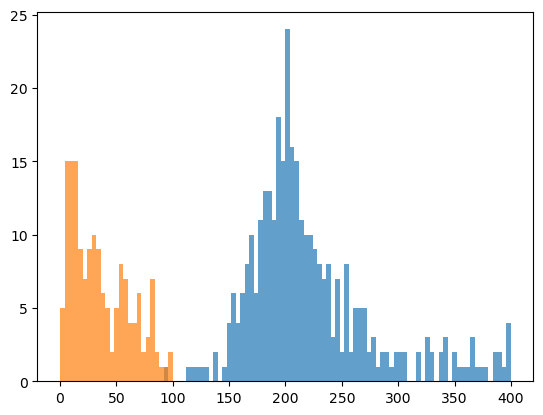

In [76]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak



sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()

pdgid = events["LHEPart_pdgId"].array()
tagger = events["FatJet_particleNetWithMass_TvsQCD"].array()
fatjetmass = events["FatJet_mass"].array()
jetmass = events["Jet_mass"].array()
btagger = events["Jet_btagPNetB"].array()
topjetmask = (tagger > 0.9)

botjetmask = (btagger > 0.9) & (jetmass < 100)
botjetmass = jetmass[botjetmask]
botjetmass = ak.flatten(botjetmass)
print(botjetmass)

topjetmass = fatjetmass[topjetmask]
topjetmass = ak.flatten(topjetmass)  
print(topjetmass)


plt.hist(topjetmass, bins=100, range=(0, 400), alpha=0.7, label='Top Jet Mass')
plt.hist(botjetmass, bins=100, range=(0, 400), alpha=0.7, label='b Jet Mass')



## reco top b jet and reco mass of W*

Number of b-jets: 43
Number of top jets: 351
Number of b jets: 15
Valid events: 7
[2555.2122458  2041.3054576   881.46076766 1807.00439272 4425.24559254
  273.36757252 2791.92519794]


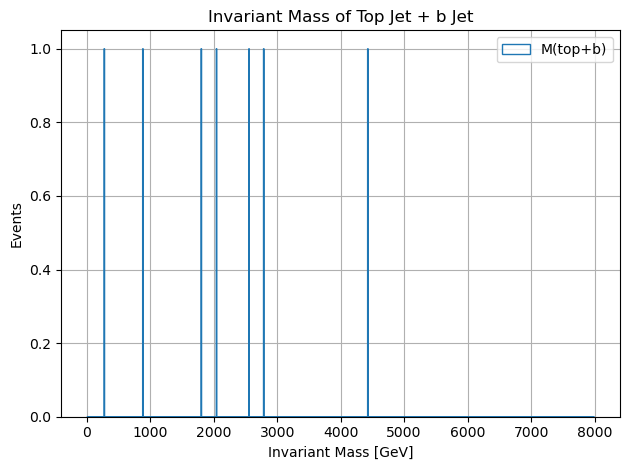

In [ ]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

vector.register_awkward()  # 중요: vector 연산 활성화

# Load file
sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()

# Load variables
top_score = events["FatJet_particleNetWithMass_TvsQCD"].array()
top_pt = events["FatJet_pt"].array()
top_eta = events["FatJet_eta"].array()
top_phi = events["FatJet_phi"].array()
top_mass = events["FatJet_mass"].array()

b_score = events["Jet_btagPNetB"].array()
b_pt = events["Jet_pt"].array()
b_eta = events["Jet_eta"].array()
b_phi = events["Jet_phi"].array()
b_mass = events["Jet_mass"].array()



# Define masks
top_mask = (top_score > 0.9) 
b_mask = (b_score > 0.9)



# Apply masks
top_pt = top_pt[top_mask]
top_eta = top_eta[top_mask]
top_phi = top_phi[top_mask]
top_mass = top_mass[top_mask]


b_pt = b_pt[b_mask]
b_eta = b_eta[b_mask]
b_phi = b_phi[b_mask]
b_mass = b_mass[b_mask]
bscore = (ak.num(b_pt) >= 2)  
print("Number of b-jets:", ak.sum(bscore))  ## bjet 0.9 이상인 b-jet의 갯수
# 여러개의 b 중에서 
real_b_mask = (b_mass < 100)

b_pt = b_pt[real_b_mask]
b_eta = b_eta[real_b_mask]
b_phi = b_phi[real_b_mask]
b_mass = b_mass[real_b_mask]


t= (ak.num(top_pt) ==1)
print("Number of top jets:", ak.sum(t)) # t-jet 0.9 이상인 top-jet의 갯수
b = (ak.num(b_pt) >= 2)
print("Number of b jets:", ak.sum(b))

# 필터: 이벤트당 최소 1개 top-jet, 2개 b-jet 있어야 함
valid_events = (ak.num(top_pt) > 0) & (ak.num(b_pt) > 1)
print("Valid events:", ak.sum(valid_events))

# valid event만 유지
top_pt = top_pt[valid_events]
top_eta = top_eta[valid_events]
top_phi = top_phi[valid_events]
top_mass = top_mass[valid_events]

b_pt = b_pt[valid_events]
b_eta = b_eta[valid_events]
b_phi = b_phi[valid_events]
b_mass = b_mass[valid_events]



# 벡터 구성 (이벤트당 leading jet 사용)
topjet = vector.array({
    "pt": top_pt[:, 0],
    "eta": top_eta[:, 0],
    "phi": top_phi[:, 0],
    "mass": top_mass[:, 0],
})

bjet = vector.array({
    "pt": b_pt[:, 0],
    "eta": b_eta[:, 0],
    "phi": b_phi[:, 0],
    "mass": b_mass[:, 0],
})


# 계산
m_tb = (topjet + bjet).mass
print( m_tb)
# 플로팅
plt.hist(ak.to_numpy(m_tb), bins=1000, range=(0, 8000), histtype='step', label='M(top+b)')
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Invariant Mass of Top Jet + b Jet")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### for all root file (WR reco)

Processing ROOT files: 100%|██████████| 80/80 [01:21<00:00,  1.02s/it]


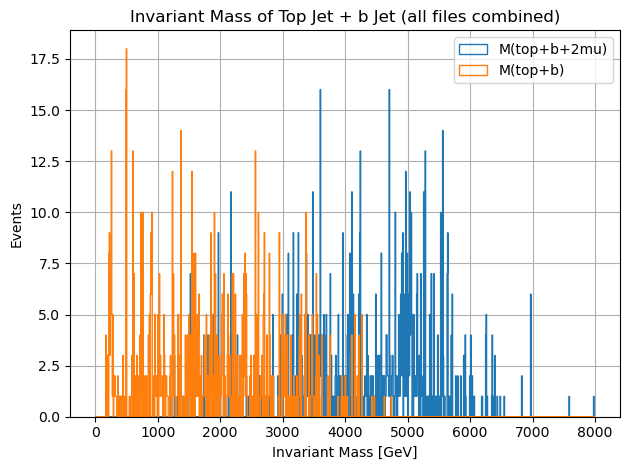

In [118]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm  # ✅ 진행률 표시

vector.register_awkward()

# 모든 .root 파일 경로 가져오기
path = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

# 누적 리스트
all_mtb = []
total_wr = []
m_n1_list = []
m_n2_list = []

# tqdm으로 파일 리스트 순회
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]

    top_score = events["FatJet_particleNetWithMass_TvsQCD"].array()
    top_pt = events["FatJet_pt"].array()
    top_eta = events["FatJet_eta"].array()
    top_phi = events["FatJet_phi"].array()
    top_mass = events["FatJet_mass"].array()

    b_score = events["Jet_btagPNetB"].array()
    b_pt = events["Jet_pt"].array()
    b_eta = events["Jet_eta"].array()
    b_phi = events["Jet_phi"].array()
    b_mass = events["Jet_mass"].array()

    # Masks
    top_mask = (top_score > 0.9)
    b_mask = (b_score > 0.9)

    # Apply masks
    top_pt = top_pt[top_mask]
    top_eta = top_eta[top_mask]
    top_phi = top_phi[top_mask]
    top_mass = top_mass[top_mask]

    b_pt = b_pt[b_mask]
    b_eta = b_eta[b_mask]
    b_phi = b_phi[b_mask]
    b_mass = b_mass[b_mask]

    # b jet filter: only realistic ones
    real_b_mask = (b_mass < 100)
    b_pt = b_pt[real_b_mask]
    b_eta = b_eta[real_b_mask]
    b_phi = b_phi[real_b_mask]
    b_mass = b_mass[real_b_mask]

    mu_pt = events["Muon_pt"].array()
    mu_eta = events["Muon_eta"].array()
    mu_phi = events["Muon_phi"].array()
    mu_mass = events["Muon_mass"].array()

    # 이벤트당 최소 2개의 뮤온이 있는지 확인
    
    # Event-level filtering
    valid_events = (ak.num(top_pt) > 0) & (ak.num(b_pt) > 1) & (ak.num(mu_pt) >= 2)

    top_pt = top_pt[valid_events]
    top_eta = top_eta[valid_events]
    top_phi = top_phi[valid_events]
    top_mass = top_mass[valid_events]

    b_pt = b_pt[valid_events]
    b_eta = b_eta[valid_events]
    b_phi = b_phi[valid_events]
    b_mass = b_mass[valid_events]

    mu_pt = mu_pt[valid_events]
    mu_eta = mu_eta[valid_events]
    mu_phi = mu_phi[valid_events]
    mu_mass = mu_mass[valid_events]

    if len(top_pt) == 0 or len(b_pt) == 0:
        continue

    topjet = vector.array({
        "pt": top_pt[:, 0],
        "eta": top_eta[:, 0],
        "phi": top_phi[:, 0],
        "mass": top_mass[:, 0],
    })

    bjet = vector.array({
        "pt": b_pt[:, 0],
        "eta": b_eta[:, 0],
        "phi": b_phi[:, 0],
        "mass": b_mass[:, 0],
    })

    lead_mu = vector.array({
        "pt": mu_pt[:, 0],
        "eta": mu_eta[:, 0],
        "phi": mu_phi[:, 0],
        "mass": mu_mass[:, 0],
    })
    sublead_mu = vector.array({
        "pt": mu_pt[:, 1],
        "eta": mu_eta[:, 1],
        "phi": mu_phi[:, 1],
        "mass": mu_mass[:, 1], 
    })

    m_tb = (topjet + bjet).mass
    m_wr = (topjet + bjet + lead_mu + sublead_mu).mass
    m_n1 = (topjet + bjet +lead_mu).mass
    m_n2 = (topjet + bjet + sublead_mu).mass
    all_mtb.append(m_tb)
    total_wr.append(m_wr)
    m_n1_list.append(m_n1)
    m_n2_list.append(m_n2)

# 병합
all_mtb = ak.concatenate(all_mtb)
all_wr = ak.concatenate(total_wr)
m_n1_list = ak.concatenate(m_n1_list)
m_n2_list = ak.concatenate(m_n2_list)
# 히스토그램
plt.hist(ak.to_numpy(all_wr), bins=1000, range=(0, 8000), histtype='step', label='M(top+b+2mu)')
plt.hist(ak.to_numpy(all_mtb), bins=1000, range=(0, 8000), histtype='step', label='M(top+b)')
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Invariant Mass of Top Jet + b Jet (all files combined)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## N mass reco

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
         0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  9.,  0.,  0.,  0.,  0.,  0.

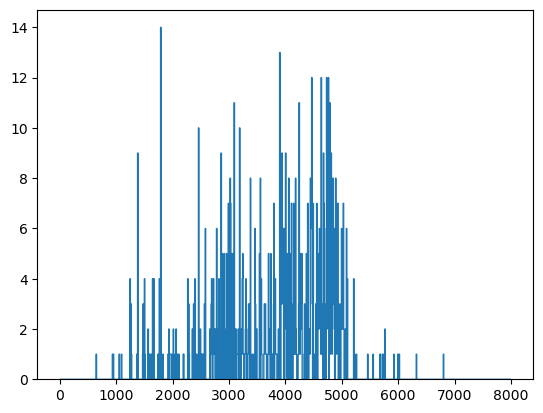

In [121]:
plt.hist(ak.to_numpy(m_n1_list), bins=1000, range=(0, 8000), histtype='step', label='M(top+b+1mu)')
#plt.hist(ak.to_numpy(m_n2_list), bins=1000, range=(0, 8000), histtype='step', label='M(top+b+2mu)')

## m(ll) for muon

(array([ 1.,  2.,  1.,  0.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  1.,  2.,
         2.,  3.,  0.,  0.,  2.,  3.,  2.,  0.,  2.,  1.,  1.,  2.,  2.,
         0.,  2.,  2.,  5.,  3.,  0.,  2.,  1.,  3.,  1.,  0.,  1.,  3.,
         4.,  3.,  7.,  2.,  5.,  1.,  4.,  1.,  4.,  7.,  3.,  1.,  1.,
         3.,  3.,  5.,  6.,  4.,  4.,  1.,  6.,  1.,  1.,  2.,  0.,  1.,
         2.,  2.,  4.,  3.,  7.,  6.,  2.,  4.,  1.,  3.,  3.,  1.,  1.,
         3.,  3.,  2.,  4.,  6.,  2.,  3.,  2.,  4.,  2.,  3.,  3.,  4.,
         1.,  2.,  5.,  0.,  4.,  5., 11.,  3.,  6.,  2.,  3.,  2.,  1.,
         6.,  2.,  1.,  2.,  1.,  4.,  3.,  0.,  4.,  3.,  5.,  4.,  2.,
         3.,  0.,  1.,  1.,  1.,  3.,  3.,  3.,  1.,  1.,  2.,  1.,  2.,
         1.,  1.,  2.,  0.,  1.,  1.,  1.,  2.,  1.,  5.,  1.,  2.,  2.,
         0.,  0.,  2.,  3.,  3.,  2.,  3.,  0.,  0.,  1.,  2.,  3.,  2.,
         1.,  1.,  0.,  2.,  2.,  1.,  2.,  3.,  2.,  1.,  0.,  1.,  0.,
         2.,  3.,  1.,  2.,  2.,  1.,  2.,  0.,  0.

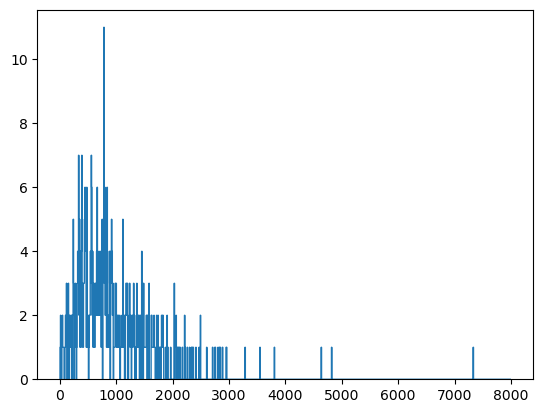

In [ ]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# 파일 로드
sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]


mass_sum  = (lead_mu + sublead_mu).mass
plt.hist(ak.to_numpy(mass_sum), bins=1000, range=(0, 8000), histtype='step', label='M(lead + sublead muon)')


## S channel boost (gamma factor)

Gamma factor of WR: [nan, 1, 1.21, 1.23, nan, 1.06, 1.05, ..., 1.12, 1.11, 1, 1.01, 1.07, 1.07]


(array([99., 44., 36., 27., 24., 26., 16., 25., 32., 14., 24.,  8., 17.,
        26., 16., 16.,  5., 14., 10.,  7.,  4.,  6., 11., 11.,  7., 14.,
         7., 13.,  8.,  7.,  8.,  5., 13.,  4.,  3.,  6.,  8.,  4.,  8.,
         6.,  8.,  3.,  4.,  5.,  3.,  4.,  2.,  6.,  3.,  3.,  7.,  1.,
         1.,  2.,  3.,  2.,  3.,  1.,  4.,  0.,  3.,  1.,  1.,  0.,  0.,
         2.,  3.,  0.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,
         1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

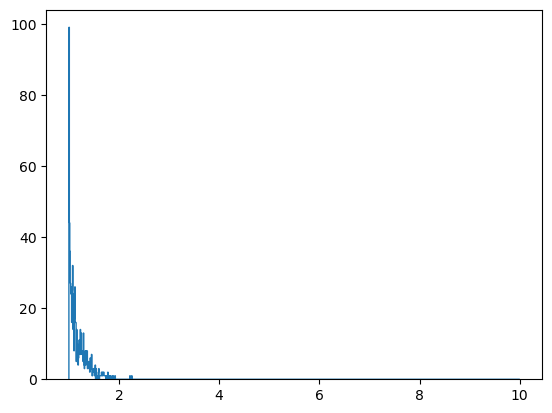

In [40]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-3000_MN-1300_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-3000_MN-1300_13p6TeV_0.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()

lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()
genpdgid = events["GenPart_pdgId"].array()
genpt = events["GenPart_pt"].array()
geneta = events["GenPart_eta"].array()
genphi = events["GenPart_phi"].array()
genmass = events["GenPart_mass"].array()
wr_mask = (genpdgid == 34)

wr_pt = genpt[wr_mask]
wr_eta = geneta[wr_mask]
wr_phi = genphi[wr_mask]
wr_mass = genmass[wr_mask]

wr_E = np.sqrt(wr_pt**2 * np.cosh(wr_eta)**2 + wr_mass**2)
gamma = wr_E / wr_mass
gammafactor= ak.flatten(gamma)
print("Gamma factor of WR:", gammafactor)
plt.hist(ak.to_numpy(gammafactor), bins=1000, range=(1, 10), histtype='step', label='Gamma factor of WR')

